In [1]:
# Important statistics to be considered before heading into the data analysis
# black population as of july 2019: 0.134 * 328,239,523
# total population as of july 2019: 328,239,523

# 2010 black percent: 13.6 (2010 census report)
# 2011

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel("MPVDatasetDownload.xlsx")
dataset.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,2019-12-31,Broad St.,Globe,AZ,85501.0,...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,NaN,Male,Unknown race,NaN,2019-12-31,7239-7411 I-40,Memphis,AR,38103.0,...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,2019-12-31,3600 N 24th St,Omaha,NE,68110.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,2019-12-31,30800 14th Avenue South,Federal Way,WA,98003.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,2019-12-31,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667


In [3]:
# drop rows that contain Nan values
dataset = dataset[pd.notnull(dataset["Victim's race"])]
print(len(dataset))

7663


5.357142857144511


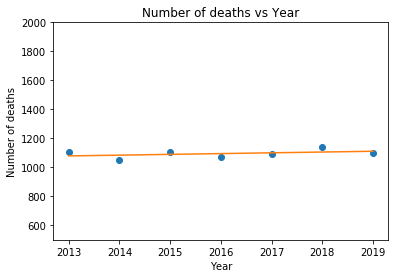

In [13]:
# AOI 1
deaths_per_year = extract_deaths_from_year(dataset)
x = np.array(range(2013, 2020))
y = np.array(extract_deaths_from_year(dataset))

m, b = np.polyfit(x, y, 1)
print(m)
plt.ylim(500, 2000)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.title('Number of deaths vs Year')
plt.xlabel('Year')
plt.ylabel('Number of deaths')

plt.savefig('aoi1.png')


In [7]:
#AOI 2

all_killings = len(dataset.index)
black_killings = len(dataset.loc[dataset["Victim's race"] == "Black"].index)
unknown_killings = len(dataset.loc[dataset["Victim's race"] == "Unknown race"].index)


print(black_killings)
print(unknown_killings)


# percent of brutality cases resulting in death of black people
black_killings/(all_killings)

# 24-26% of all deaths, with a slight variance caused by the fact that this data does not inlcude
# all instances of police brutality. If we say that approximately 25% of deaths were those of black
# people, then we can see that there is an imbalance:


1944
670


0.25368654573926663

/Users/pavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[291, 277, 305, 279, 276, 257, 259]
-5.892857142858154


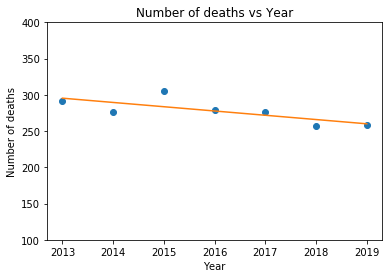

In [19]:
#AOI 3
print(extract_black_deaths_from_year(dataset))
deaths_per_year = extract_black_deaths_from_year(dataset)
x = np.array(range(2013, 2020))
y = np.array(extract_black_deaths_from_year(dataset))

m, b = np.polyfit(x, y, 1)
print(m)
plt.ylim(100, 400)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.title('Number of deaths vs Year')
plt.xlabel('Year')
plt.ylabel('Number of deaths')

plt.savefig('aoi3.png')

In [16]:
#AOI 1
def extract_deaths_from_year(dataset):
    dataset['year'] = pd.DatetimeIndex(dataset['Date of Incident (month/day/year)']).year
    deaths = []
    for i in range(2013,2020):
        deaths.append(len(dataset.loc[dataset['year'] == i].index))
    return deaths

#AOI 3
def extract_black_deaths_from_year(dataset):
    adjusted_data = dataset.loc[dataset["Victim's race"] == "Black"]
    adjusted_data['year'] = pd.DatetimeIndex(adjusted_data['Date of Incident (month/day/year)']).year
    deaths = []
    for i in range(2013,2020):
        deaths.append(len(adjusted_data.loc[adjusted_data['year'] == i].index))
    return deaths

In [20]:
# Day 2

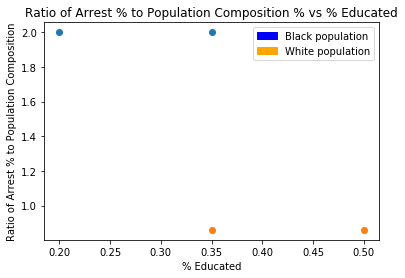

In [31]:
#AOI 1
import matplotlib.patches as mpatches
x = np.array([0.20, 0.35]) # black
y = np.array([2, 2]) # multiple of population composition

plt.plot(x, y, 'o')

x = np.array([0.35, 0.50]) # white
y = np.array([0.86, 0.86]) # multiple of population composition

plt.plot(x, y, 'o')
plt.title('Ratio of Arrest % to Population Composition % vs % Educated')
plt.xlabel('% Educated')
plt.ylabel('Ratio of Arrest % to Population Composition')
plt.legend(handles = [mpatches.Patch(color='blue', label='Black population'), mpatches.Patch(color='orange', label='White population')])

plt.savefig('day2aoi1.png')

In [33]:
# AOI 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dataset = pd.read_excel("MPVDatasetDownload.xlsx")

In [37]:
def extract_racial_entries(dataset, race):
    return dataset.loc[dataset["Victim's race"] == race]

black_deaths = extract_racial_entries(dataset, "Black")
non_black_deaths = dataset[dataset["Victim's race"] != "Black"]

In [68]:
print(len(black_deaths))
print(len(non_black_deaths))

1944
5719


In [48]:
black_unarmed = black_deaths[black_deaths["Unarmed"] == "Unarmed"]
len(black_unarmed)
rest_unarmed = non_black_deaths[non_black_deaths["Unarmed"] == "Unarmed"]
print(len(black_unarmed))
print(len(rest_unarmed))

black_percent_unarmed = len(black_unarmed)/len(black_deaths)
rest_percent_unaremd = len(rest_unarmed)/len(non_black_deaths)

336
737


In [49]:
print(black_percent_unarmed)
print(rest_percent_unaremd)

0.1728395061728395
0.1288686833362476


In [54]:
def extract_unarmed_yearly_deaths_by_race(dataset, race):
    adjusted_data = dataset[dataset["Victim's race"] == race]
    adjusted_data = adjusted_data[adjusted_data["Unarmed"] == "Unarmed"]
    adjusted_data['year'] = pd.DatetimeIndex(adjusted_data['Date of Incident (month/day/year)']).year
    deaths = []
    for i in range(2013,2020):
        deaths.append(len(adjusted_data.loc[adjusted_data['year'] == i].index))
    return deaths

def extract_unarmed_yearly_deaths_by_all_except_race(dataset, race):
    adjusted_data = dataset[dataset["Victim's race"] != race]
    adjusted_data = adjusted_data[adjusted_data["Unarmed"] == "Unarmed"]
    adjusted_data['year'] = pd.DatetimeIndex(adjusted_data['Date of Incident (month/day/year)']).year
    deaths = []
    for i in range(2013,2020):
        deaths.append(len(adjusted_data.loc[adjusted_data['year'] == i].index))
    return deaths

In [59]:
print(extract_unarmed_yearly_deaths_by_race(dataset, "Black"))
print(extract_unarmed_yearly_deaths_by_all_except_race(dataset, "Black"))

percent_unarmed_black = [x / len(black_deaths) for x in extract_unarmed_yearly_deaths_by_race(dataset, "Black")]
percent_unarmed_rest = [x / len(non_black_deaths) for x in extract_unarmed_yearly_deaths_by_all_except_race(dataset, "Black")]

sum2 = 0
sum1 = 0
for i in range(len(extract_unarmed_yearly_deaths_by_all_except_race(dataset, "Black"))):
    sum2 += extract_unarmed_yearly_deaths_by_all_except_race(dataset, "Black")[i]
    sum1 += extract_unarmed_yearly_deaths_by_race(dataset, "Black")[i]
    
print(sum1)
print(sum2)

[50, 64, 78, 40, 48, 28, 28]
[108, 117, 141, 109, 92, 84, 86]
336
737


-0.003086419753087242


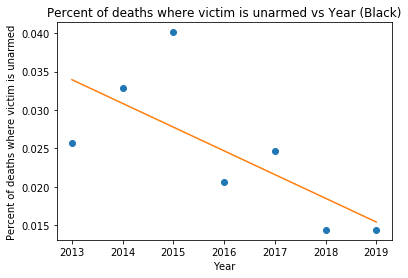

In [66]:
x = np.array(range(2013, 2020))
y = np.array(percent_unarmed_black)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.title('Percent of deaths where victim is unarmed vs Year (Black)')
plt.xlabel('Year')
plt.ylabel('Percent of deaths where victim is unarmed')

plt.savefig('day2aoi21.png')

-0.001130317488072633


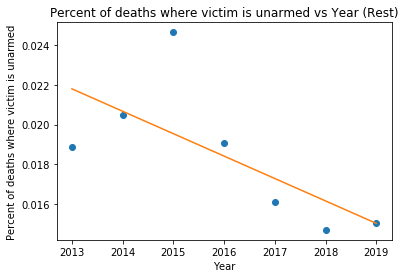

In [67]:
x = np.array(range(2013, 2020))
y = np.array(percent_unarmed_rest)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.title('Percent of deaths where victim is unarmed vs Year (Rest)')
plt.xlabel('Year')
plt.ylabel('Percent of deaths where victim is unarmed')

plt.savefig('day2aoi22.png')